In [13]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [14]:
from bs4 import BeautifulSoup
import requests

In [15]:
res = requests.get("https://en.wikipedia.org/wiki/ISO_3166-1_numeric#Officially_assigned_code_elements")
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
soup = BeautifulSoup(res.content,'xml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

df = df.drop(0)

df.iloc[0][0] = "004"
df.columns = ["Code", "Country"]

In [16]:
df.head()

,Code,Country
1,004,Afghanistan
2,008,Albania
3,010,Antarctica
4,012,Algeria
5,016,American Samoa


In [17]:
df = df.reset_index()
df.head(), df.shape

(   index Code         Country
 0      1  004     Afghanistan
 1      2  008         Albania
 2      3  010      Antarctica
 3      4  012         Algeria
 4      5  016  American Samoa, (249, 3))

In [18]:
df.head(), df.shape

(   index Code         Country
 0      1  004     Afghanistan
 1      2  008         Albania
 2      3  010      Antarctica
 3      4  012         Algeria
 4      5  016  American Samoa, (249, 3))

In [43]:
data = pd.read_csv('data/cpj_dates.csv')
data.head()

,Unnamed: 0,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,clean_dates
0,0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-22
1,1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-21
2,2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-02
3,3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,2016-08-14
4,4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,2016-08-08


In [44]:
countries = list(data['Country_killed'])

In [45]:
df_country = df.Country
df_codes = df.Code

codes_dict = dict(zip(df_country, df_codes))

In [46]:
codes_column = []
empty_countries = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column.append(code)

In [47]:
list(set(empty_countries))

[nan,
 'Yugoslavia',
 'UK',
 'Democratic Republic of the Congo',
 'Tanzania',
 'Venezuela',
 'Israel and the Occupied Palestinian Territory',
 'Bolivia',
 'Bosnia',
 'Iran',
 'Vietnam',
 'USA',
 'Russia',
 'East Timor',
 'Ivory Coast',
 'Republic of Congo',
 'Syria']

In [48]:
codes_dict['Russian Federation']

'643'

In [49]:
missing_countries = list(set(empty_countries))
missing_codes = [np.nan, 70, 714, 364, 834, 376, 180, 862, 890, 384, 760, 840, 626, 643, 178, 826, 68]

In [50]:
len(missing_codes) == len(missing_countries)

True

In [51]:
for i in range(len(missing_countries)):
    codes_dict[missing_countries[i]] = missing_codes[i]

In [52]:
codes_column_2 = []
empty_countries_2 = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column_2.append(code)

In [53]:
codes_dict['USA'] , codes_dict['East Timor'] , codes_dict['United States of America'] , 

(840, 643, '840')

In [54]:
len(codes_column_2)== data.shape[0]

True

In [55]:
data['Country_code'] = codes_column_2

In [56]:
data.head()

,Unnamed: 0,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,...,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,clean_dates,Country_code
0,0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,...,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-22,368
1,1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,...,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-21,368
2,2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,...,Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-02,434
3,3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,...,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,2016-08-14,368
4,4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,...,No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,2016-08-08,586


In [59]:
data.to_csv("data/cpj_dates_codes.csv", header=True)

In [57]:
country_counts_df = data.groupby('Country_killed').count()

final_country_counts = []
final_country_names = country_counts_df.index.values
final_country_codes = []
for i in range(country_counts_df.shape[0]):
    code = codes_dict[final_country_names[i]]
    final_country_codes.append(code)
    
    count = max(country_counts_df.iloc[i])
    final_country_counts.append(count)

In [58]:
final_counts_df = pd.DataFrame()
final_counts_df['Country'] = final_country_names
final_counts_df['Code'] = final_country_codes
final_counts_df['Count'] = final_country_counts

final_counts_df.head()

,Country,Code,Count
0,Afghanistan,004,36
1,Algeria,012,61
2,Angola,024,11
3,Argentina,032,4
4,Armenia,051,1


In [35]:
from vega_datasets import data as data_vega

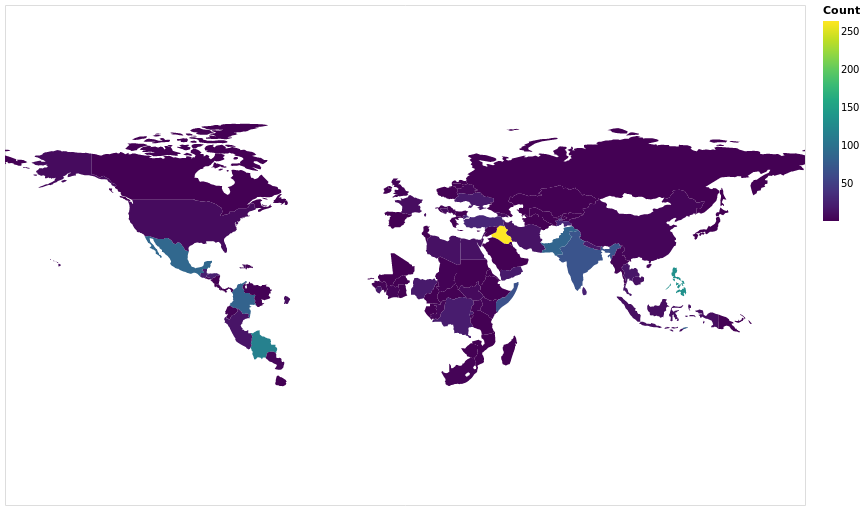

In [60]:
countries = alt.topo_feature(data_vega.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape().project(
    type='equirectangular'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(final_counts_df, 'Code', ['Count','Country','Code'])
).encode(
    color='Count:Q',
    tooltip=['Country:N','Code:N','Count:Q']
).properties(
    width=800,
    height=500,
)

In [61]:
data[data.Country_killed=='East Timor']

,Unnamed: 0,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,...,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,clean_dates,Country_code
898,898,Motive Confirmed,"September 25, 1999",Agus Muliawan,Male,East Timor,Asia Press International,East Timor,Print,Print Reporter,...,No,Local,Paramilitary Group,Dangerous Assignment,NaN,No,No,No\n,1999-09-25,643
899,899,Motive Confirmed,"September 21, 1999",Sander Thoenes,Male,East Timor,Freelancer,The Netherlands,Print,Print Reporter,...,Yes,Foreign,Military Officials,Murder,Yes,No,No,Yes\n,1999-09-21,643


In [62]:
df.head()

,index,Code,Country
0,1,004,Afghanistan
1,2,008,Albania
2,3,010,Antarctica
3,4,012,Algeria
4,5,016,American Samoa


In [63]:
final_counts_df.head()

,Country,Code,Count
0,Afghanistan,004,36
1,Algeria,012,61
2,Angola,024,11
3,Argentina,032,4
4,Armenia,051,1


In [64]:
result = pd.merge(df, final_counts_df, on = 'Code', how='left')

In [65]:
df.shape

(249, 3)

In [66]:
final_counts_df.shape

(104, 3)

In [67]:
result.shape

(249, 5)

In [68]:
result.drop('Country_y',inplace=True, axis=1)

In [69]:
result = result.fillna(0)

In [70]:
result.columns = ['index', 'Code', 'Country', 'Count']

In [71]:
result['Code'] = result['Code'].astype(int)

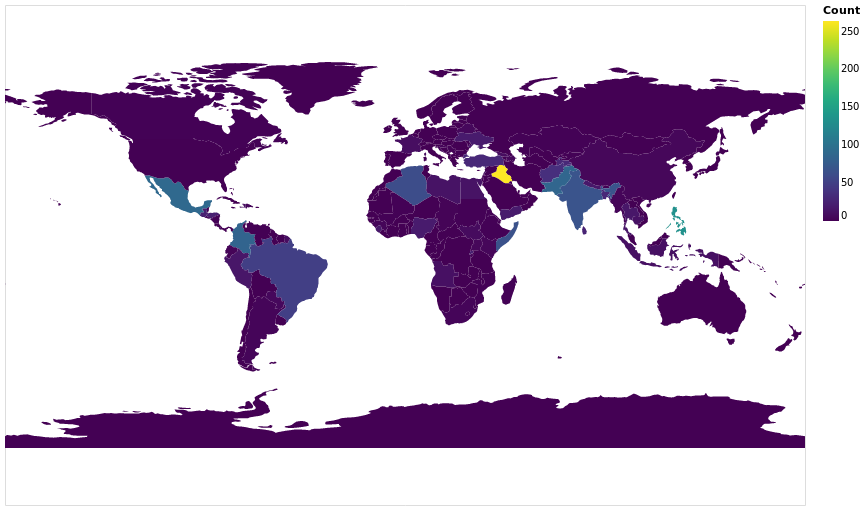

In [72]:
countries = alt.topo_feature(data_vega.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape().project(
    type='equirectangular'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(result, 'Code', ['Count','Country','Code'])
).encode(
    color='Count:Q',
    tooltip=['Country:N','Code:N','Count:Q']
).properties(
    width=800,
    height=500,
)

### interactive time thing : Geoview

In [4]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')
import geoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
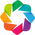

In [5]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh', 'matplotlib')

In [8]:
data = pd.read_csv("data/cpj_dates.csv")

In [10]:
%%output backend='matplotlib'
dataset = gv.Dataset(data)
dataset.to(gv.Image, ['longitude', 'latitude']).options(cmap='viridis', colorbar=True, fig_size=200) * gf.coastline()

ValueError: Image vdims must be between length 1 and 1.

In [89]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='seashiva94', api_key='DlDIiHb9cxvEm4g0a2jV')

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [91]:
for col in df.columns:
    df[col] = df[col].astype(str)

In [92]:
df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

In [93]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Fruit...


In [94]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


In [95]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

In [96]:
layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [97]:
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~seashiva94/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


/home/arnav/miniconda3/envs/viz_project/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [98]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [99]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


### get alpha3 codes for countries

In [149]:
from bs4 import BeautifulSoup
import requests

In [150]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes")
soup = BeautifulSoup(res.content,'xml')
table = soup.find_all('table')[0] 
wiki_df = pd.read_html(str(table))[0]



In [115]:
wiki_df.head()

,0,1,2,3,4,5,6,7
0,ISO 3166[1],Official state name[5],Sovereignty[5][6][7],ISO 3166-1[2],ISO 3166-2[3],Internet ccTLD[8],NaN,NaN
1,Country name[9],Alpha-2 code[9],Alpha-3 code[9],Numeric code[9],Subdivision code links[3],NaN,NaN,NaN
2,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
3,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
4,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al


In [116]:
cols = wiki_df.iloc[0,:]
wiki_df.drop([0,1], inplace = True)
#wiki_df = df.drop(0)

In [117]:
wiki_df.columns = cols
wiki_df.head()

,ISO 3166[1],Official state name[5],Sovereignty[5][6][7],ISO 3166-1[2],ISO 3166-2[3],Internet ccTLD[8],nan,nan
2,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
3,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
4,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al
5,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz
6,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as


In [134]:
codes = wiki_df[cols[5]]
alpha_3 = wiki_df[cols[4]]

codes_alpha_df = pd.DataFrame()
codes_alpha_df["Code"] = codes
codes_alpha_df["Alpha"] = alpha_3

codes_alpha_df["Code"] = codes_alpha_df["Code"].astype(float)

In [135]:
codes_alpha_df.head()

,Code,Alpha
2,4.0,AFG
3,248.0,ALA
4,8.0,ALB
5,12.0,DZA
6,16.0,ASM


In [136]:
data_dates_codes = pd.read_csv("data/cpj_dates_codes.csv")
data_dates_codes.head()

,Unnamed: 0,Unnamed: 0.1,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,...,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,clean_dates,Country_code
0,0,0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",...,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-22,368.0
1,1,1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,...,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-21,368.0
2,2,2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",...,Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-02,434.0
3,3,3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,...,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,2016-08-14,368.0
4,4,4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,...,No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,2016-08-08,586.0


In [147]:
Alpha_3_codes = []
for i in range(data_dates_codes.shape[0]):
    row = data_dates_codes.iloc[1,:]
    code = row.Country_code
#     print(code)
    alpha = codes_alpha_df[codes_alpha_df.Code == code].iloc[0][1]
    Alpha_3_codes.append(alpha)
#     print(alpha)
#     break

data_dates_codes["Alpha_3_codes"] = Alpha_3_codes
print(len(Alpha_3_codes), data_dates_codes.shape)

1782 (1782, 23)


In [148]:
data_dates_codes.head()

,Unnamed: 0,Unnamed: 0.1,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,...,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,clean_dates,Country_code,Alpha_3_codes
0,0,0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",...,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-22,368.0,IRQ
1,1,1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,...,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-21,368.0,IRQ
2,2,2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",...,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,2016-10-02,434.0,IRQ
3,3,3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,...,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,2016-08-14,368.0,IRQ
4,4,4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,...,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,2016-08-08,586.0,IRQ


In [151]:
data_dates_codes.to_csv("data/cpj_dates_codes_alpha.csv")